In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### What are the different type of missing values?

#### 1. MCAR:
Missing completely at random(MCAR). 
Which means there will be no relationship between the missing values and other values in dataset.

  eg: Embarked refers to the stations. As per commonsense Embarked does not have any corelation to any other variables. But Age and Cabin have some corelation.
  
#### 2. MNAR:
Missing not at random(MNAR).
Which means there will be relationship between the missing values and other values in dataset.

  eg: Age and Cabin.
  
#### 3. MAR:
Missing at random(MAR)
  
  eg: men---salary
      female---age  (Hesitate to share data)
  

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Trying to find the percentage of null values in Cabin variable

Now creating a new variable and going to assign 1 for nan and 0 for non nan  

In [5]:
df['cabin_nan']=np.where(df['Cabin'].isnull(),1,0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
df.cabin_nan.mean()

0.7710437710437711

# All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


## Mean/Median/Mode replacement

#### When should we apply?    When the missing values follows MCAR. Replace the nan with most frequent occurance of the variable

In [7]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
### creating a function to fill nan with median

def impute_nan(df,variable):
    df[variable+'_median']=df['Age'].fillna(df['Age'].median())

In [10]:
impute_nan(df,'Age')

In [11]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [12]:
df[df['Age'].isnull()].head()

,Survived,Age,Fare,Age_median
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0


In [13]:
# NAN values are replaced with 28(median of age)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
import warnings

In [16]:
warnings.filterwarnings(action='ignore')

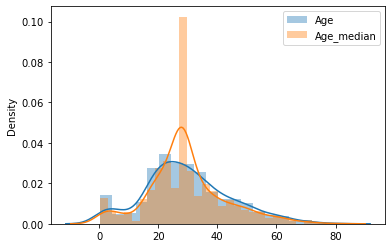

In [17]:
sns.distplot(df.Age,label='Age')
sns.distplot(df.Age_median,label='Age_median')
plt.xlabel(None)
plt.legend()

### Advantages 

1. Easy to implement
2. Faster way to obtain the complete dataset

### Disadvantage

1. Change or distortion in original variance
2. Impacts correlation